<a href="https://colab.research.google.com/github/Diana-ops/diananeri/blob/master/Detec%C3%A7%C3%A3o_CarrosHarr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Processamento de Imagem para Detecção de Carros com Haar Cascade e OpenCV

A visão computacional (VC) é meio de fazer as maquinas "enchergarem" as coisas como nós, seres humanos. Uma das ações que fazemos utilizando não só a visão como muitos outros sentidos é dirigir. 

Quando realizamos este processo, precisamos detectar a presença de outros carros na estrada, de pedestres passando, da indicação do semaforo (verde, amarelo e vermelho), de placas e muitos outros fatores que interferem nas nossas decisões. 


---

![alt text](https://miro.medium.com/max/3360/1*5lVCJ0SFVvOc4h2rta-7yg.jpeg)

---





A fim de pesquisar a aplicação da VC em carros autonomos, este atigo será o primeiro passo para desenvolver um sistema que consiga "enchergar" as principais coisas que podemos encontrar em uma via, que neste caso, seriam os carros.

Para fazer isso, inicialmente será feito e explicado os principais processos de manipulação de imagens utilizados na visão computacional, como filtros, recortes, giros nas imagens e tudo mais mostrando os processos e no fim, será apresentado qual foi a melhor manipulação para uma determinada imagem. 

Os recursos que iremos utilizar inicialmente serão:


1.   Python 3.7 instalado na máquina; 
2.   Biblioteca OpenCV e PIL Image; 
3.   Uso da apostila <http://professor.luzerna.ifc.edu.br/ricardo-antonello/wp-content/uploads/sites/8/2017/02/Livro-Introdu%C3%A7%C3%A3o-a-Vis%C3%A3o-Computacional-com-Python-e-OpenCV-3.pdf> como referencia durante as etapas. 


Inicialmente, importaremos as bibliotecas para conseguir abrir a nossa primeira imagem: 





In [0]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 3.4MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4264063 sha256=63284ed23d66e9243efbdbcbdc4209574fe47bae989b00b332e5e4fb7145a935
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
from google.colab.patches import cv2_imshow
import cv2 #OpenCV
from google.colab import files
from matplotlib import pyplot as plt #Trabalha na contrução de gráficos 
import numpy as np #Trabalha com matemática analitica 
import mahotas

##1. Abrindo uma imagem 

Primeiro, faremos o upload de uma imagem com carros em uma estrada na máquina e subiremos aqui. 

In [0]:
img = files.upload()  #Selecione a imagem 

Saving carro_2.jpg to carro_2.jpg


In [0]:
imagem = cv2.imread("carro_2.jpg") #Abre a imagem selecionada 
cv2_imshow(imagem) #Mostra a imagem na tela 

##2. Coletando informações sobre a imagem 

Toda imagem é formada por pixels dentro de uma determinada largura por altura. Quanto mais pixels tivermos dentro do tamanho de uma imagem, maior resolução ela terá, ficando mais fácil de retirar informações para manipula-la. 

Quando temos uma imagem em **preto e branco**, temos uma matriz com uma quantidade de pixels que dependem do produto largura*altura, onde cada um assumirá um valor entre 0 a 255 (8 bits).

![](http://blogdoenem.com.br/wp-content/uploads/2016/07/1-1.png)

_Fonte da Imagem:_ http://blogdoenem.com.br/wp-content/uploads/2016/07/1-1.pn

Já no caso de imagens **coloridas**, temos como base as **cores primárias** (sim, aquelas que aprendemos no pré-primário) pois é a mistura delas que dão origem a todas as outras cores. No mundo da visão computacinal, chamamos isso de escala **RGB** (do *ingles*, red - green -blue). 

Cada cor é representada por um valor que vai de 0 (minimo) a 255 (máximo daquela cor na imagem) dentro de cada pixel. Como temos 3 cores, logo temos 3 matrizes de pixels que obtem um valor de 0 a 255. A soma de cada matriz dá origem a imagem original. 

![alt text](http://www.adsell.com/images/color-channels-RGB.jpg)

_Fonte da Imagem:_ http://www.adsell.com/images/color-channels-RGB.jpg

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSIa3e7H1U6APuMV_-RmFKyjxZBFuZNi37w2E9hWXM4Qpbnd9DR)

_Fonte da Imagem:_ https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSIa3e7H1U6APuMV_-RmFKyjxZBFuZNi37w2E9hWXM4Qpbnd9DR

Perceba na imagem no Charlie Chaplin que ao diminuir a quantidade de pixels a resolução da imagem piora e fica dificil de identifica-lo. Mas o principal a se notar aqui é a diferença entre o que nós seres humanos enchergamos (que no caso seria a foto à extrema esquerda) e o computador (foto à extrema direita), que só consegue processar as informações que cada pixel representa, e como este constroi a imagem, dizemos que o computador é capaz de "ve-las".

Portanto, para trabalhar com processamento de imagens é exencial ter um pouco de dominio na **manipulação de pixels**. 

Agora, a partir da imagem escolhida podemos saber o tamanho de sua altura e largura: 


In [0]:
print("Largura: ", imagem.shape[0])
print("Altura: ", imagem.shape[1])

Largura:  452
Altura:  678


Além de suas dimensões, também podemos analisar a intensidade do conjunto de pixels, o que é extremamente importante para saber se a imgem tem um bom contraste, se está "estourada" (*isto é, se há muita luz nela, o que estragaria sua qualidade*) ou se não existe muita luz, ou seja, mais escura (*neste caso,a qualidade da imagem pode ser salva com algum tratamento de imagem*).

Chamamos esses dois tipos de imagem de "Imagem Super Esposta" (com muita luz) e "Imagem Sub Esposta" (com menos luz).

Vale lembrar, que se a imagem estiver mais escura é possível aplicar um tratamento de imagem e obter melhores resultados para a análise do que se ela tiver mais luminosidade. 

Para analisar todos esses parametros citados, iremos contruir um gráfico que mostra a intensidade dos pixels ao longo da imagem. 

In [0]:
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #Converte a imagem em escala cinza 

#Calculando o histograma da imagem 
histograma = cv2.calcHist([img], [0], None, [256], [0,256])

#Construindo o gráfico em matplotlib 
plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Quantidade de Pixels")
plt.plot(histograma)
plt.xlim([0,256])
plt.show()

O gráfico acima mostra o histograma da imagem, que possuí pixels com intensidade mais escura, o que é bom, pois como dito anteriormente é possível fazer um tratamento de imagem posteriormente para resaltar melhor suas caracteristicas. 

Antes de começarmos a aplicar o *Haar Cascade*, aplicaremos algumas manipulações de pixels da imagem pois será importante para seguir no processamento de imagens. 

##3.Manipulação dos pixels da imagem

Para tal, é necessário saber a largura e altura da imagem, justamente para conseguir varrer todos os pixels da imagem. Podemos associar esse processo com uma matriz, pois esta possui linhas e colunas.  

Neste primeiro exemplo, mudarei a cor dos pixels para azul de maneira intercalada, isto é, pulando de 10 em 10 pixels e atribuindo a cor azul para um conjunto de 5 pixels. 

In [0]:
#Para todos os pixels da imagem 
altura = imagem.shape[0]
largura = imagem.shape[1]

for h in range(0, altura, 10): #A cada 10 pixels em altura 
	for l in range(0, largura, 10): #A cada 10 pixels em largura 
		#Agrupamos 5 pixels e atribuimos uma nova escala de cor (no caso, azul)
		imagem[h:h+5,l:l+5] = (255,0,0) 
	
cv2_imshow(imagem) #Salva a imagem em formado .jpg na sua máquina 
cv2.waitKey()

## 4.Mascaras 
Dentre alguns passos do processamento de imagem temos a aplicação de  **mascaras**, que como próprio nome pode sugerir, a utilizamos quando queremos esconder alguma parte da imagem que não é tão relevante.

No nosso caso, a nossa imagem é composta basicamente por uma estrada com carros e uma paisagem ao fundo, e como o objetivo é fazer a detecção de **carros**, podemos esconder justamente essa paisagem ao fundo e focar no que realmente importa. 

Ao aplicar uma mascara, a região que será escondida terá os pixels mudados para preto (como se estivessemos os desligando mesmo). Acompanhe o script abaixo:

In [0]:
imagem = cv2.imread("carro_2.jpg") 
mascara = np.zeros(imagem.shape[:2], dtype = "uint8") 
(cX, cY) = (imagem.shape[1] // 3, imagem.shape[0] // 2) #[1] Determina a posição em que queremos aplicar a forma da mascara 
cv2.circle(mascara, (cX, cY), 170, 255, -1) #[2]Forma uma mascara em forma de circulo 

cv2_imshow(mascara) #Mascara aplicada
img_mascara = cv2.bitwise_and(imagem, imagem, mask = mascara) #Aplica a mascara na imagem
cv2_imshow(img_mascara)

Em [1] pode-se ajustar a posição em que a mascara será formada. No caso, ajustei em uma posição para pegar a estrada e ignorar o resto.

Já em [2] pode-se ajustar a abertura do circulo (ajustei em 170) e a cor da mascara (255, ficando na cor branca).

##5.Sistemas de Cores 

É possível gerar uma nova imagem em escala cinza, preto e branco (PB), HSV e e L*a*b*. 

In [0]:
imagem = cv2.imread("carro_2.jpg") 
# Converte a imagem em escala cinza 
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Coverte a imagem para HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

# Coverte a imagem para L*A*B
lab = cv2.cvtColor(imagem, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)
cv2.waitKey(0)

###6. Suavização

A **suavização** tem como objetivo filtrar uma imagem, dimiuindo a quantidade de informações que ela pode apresentar. Em uma imagem colorida, podemos encontrar uma escala de cores tanto para verde, vermelho e azul, já em esacala cinza, teremos menos variação na intensidade de pixels da imagem, fazendo com que ela se torne mais "simples" para o ponto de vista computacional. 

O primeiro tipo de suavização que será aplicado é o por media, que deixará a imagem embassada:

In [0]:
img = cv2.imread('carro_2.jpg')
img = img[::2,::2] # Diminui a imagem

#Matriz de imagens suavizadas 
suave = np.vstack([
 np.hstack([img, cv2.blur(img, ( 3, 3))]),
 np.hstack([cv2.blur(img, (5,5)), cv2.blur(img, ( 7, 7))]),
 np.hstack([cv2.blur(img, (9,9)), cv2.blur(img, (11, 11))]),
 ])
cv2_imshow(suave)

Agora, será aplicada a suavização pela **gaussiana**:

In [0]:
img = cv2.imread('carro_2.jpg')
img = img[::2,::2] # Diminui a imagem
suave = np.vstack([
 np.hstack([img,
 cv2.GaussianBlur(img, ( 3, 3), 0)]),
 np.hstack([cv2.GaussianBlur(img, ( 5, 5), 0),
 cv2.GaussianBlur(img, ( 7, 7), 0)]),
 np.hstack([cv2.GaussianBlur(img, ( 9, 9), 0),
 cv2.GaussianBlur(img, (11, 11), 0)]),
 ])
cv2_imshow(suave)

Suavização pela **mediana**:

In [0]:
img = cv2.imread('carro_2.jpg')
img = img[::2,::2] # Diminui a imagem
suave = np.vstack([
 np.hstack([img,
 cv2.medianBlur(img, 3)]),
 np.hstack([cv2.medianBlur(img, 5),
 cv2.medianBlur(img, 7)]),
 np.hstack([cv2.medianBlur(img, 9),
 cv2.medianBlur(img, 11)]),
 ])
cv2_imshow(suave)

Por fim, a sualização com filtro **bilaterial**:

In [0]:
img = cv2.imread('carro_2.jpg')
img = img[::2,::2] # Diminui a imagem
suave = np.vstack([
 np.hstack([img,
 cv2.bilateralFilter(img, 3, 21, 21)]),
 np.hstack([cv2.bilateralFilter(img, 5, 35, 35),
 cv2.bilateralFilter(img, 7, 49, 49)]),
 np.hstack([cv2.bilateralFilter(img, 9, 63, 63),
 cv2.bilateralFilter(img, 11, 77, 77)])
 ])
cv2_imshow(suave)

##7. Binarização com Limiar

In [0]:
#Escrever o que siginifica cada parte do codigo, que parametros ele recebe e analisar melhor os resultados
#Pesquisar um pouco sobre a teoria desses metodos 
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255,
cv2.THRESH_BINARY_INV)
resultado = np.vstack([
np.hstack([suave, bin]),
np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])
])
cv2_imshow(resultado)

###7.1 Threshold adaptativo

In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converte
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
bin1 = cv2.adaptiveThreshold(suave, 255,
cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(suave, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,
 21, 5)
resultado = np.vstack([
np.hstack([img, suave]),
np.hstack([bin1, bin2])
])
cv2_imshow(resultado)

###7.2 Threshold com Otsu e Riddler-Calvard

In [0]:
def threshold(): 
  img = cv2.imread('carro_2.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converte
  suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
  T = mahotas.thresholding.otsu(suave)
  temp = img.copy()
  temp[temp > T] = 255
  temp[temp < 255] = 0
  temp = cv2.bitwise_not(temp)
  T = mahotas.thresholding.rc(suave)
  temp2 = img.copy()
  temp2[temp2 > T] = 255
  temp2[temp2 < 255] = 0
  temp2 = cv2.bitwise_not(temp2)

  resultado = [suave, temp, temp2]

  return resultado

## 8. Segmentação e métodos de detecção de bordas

Uma das tecnicas para a detecção de objetos em imagens é utilizar metodos para detecção de bordas. De maneira geral, esses metodos se baseiam na mudança brusca da intensidade de pixels para marcar contornos que seriam dos objetos que queremos detectar. 

No OpenCV, podemos encontrar alguns filtros de detecção de borda como o Sobel, Laplacian e Canny e aqui vai uma descrição de cada um deles:

_Sobel_: utiliza a junção de um filtro horizontal e vertical 

_Laplacian_: em apenas um passe é possivel gerar este tipo de filtro, onde é gerado uma borda fina com 1 pixel de largura 

_Canny_: é um dos filtros mais utilizados em detecção de bordas. Ele utiliza alguns metodos que incluiem o próprio filtro Sobel, sendo possível gerar uma nova imagem que se parece mais como um desenho pois as bordas são criadas quando há realmente muita mudança na intensidade de pixels. 

### 8.1 Sobel

In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)
resultado = np.vstack([
np.hstack([img, sobelX]),
np.hstack([sobelY, sobel])
])
cv2_imshow(resultado)

In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lap = cv2.Laplacian(img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
resultado = np.vstack([img, lap])
cv2_imshow(resultado)


In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0)
canny1 = cv2.Canny(suave, 20, 120)
canny2 = cv2.Canny(suave, 70, 200)
resultado = np.vstack([
np.hstack([img, suave ]),
np.hstack([canny1, canny2])
])
cv2_imshow(resultado)

## 10. Aplicação do Haar Cascade

Agora, começaremos a aplicar o Haar Cascade e passar a discutir o resultado de manipulações na imagem para ajuda-lo nas detecções. 

De uma maneira bem resumida,o Haar é um algoritmo matemático que analisa as formas geometricas de uma imagem para detectar objetos, faces, etc. Cada modelo de Haar estará apto para detectar algo diferente. 

É possível baixar diversos tipos dele a partir deste GitHub: https://github.com/opencv/opencv/tree/master/data/haarcascades

Para o nosso caso, usaremos um Haar para detecção de carros como no script abaixo: 

**EXPLICAR MELHOR O QUE É O HAAR E COMO ELE FAZ PARA DETECTAR AS COISAS **


###10.1 Aplicando o Haar para a Imagem Original 

In [0]:
from google.colab import files
files.upload()  #Abrindo o arquivo xml do Haar Cascade

Saving cars.xml to cars.xml


{'cars.xml': b'<?xml version="1.0"?>\r\n<!-- Add more negative to training. -->\r\n<opencv_storage>\r\n<cars3 type_id="opencv-haar-classifier">\r\n  <size>\r\n    20 20</size>\r\n  <stages>\r\n    <_>\r\n      <!-- stage 0 -->\r\n      <trees>\r\n        <_>\r\n          <!-- tree 0 -->\r\n          <_>\r\n            <!-- root node -->\r\n            <feature>\r\n              <rects>\r\n                <_>\r\n                  6 12 8 8 -1.</_>\r\n                <_>\r\n                  6 16 8 4 2.</_></rects>\r\n              <tilted>0</tilted></feature>\r\n            <threshold>0.0452074706554413</threshold>\r\n            <left_val>-0.7191650867462158</left_val>\r\n            <right_val>0.7359663248062134</right_val></_></_>\r\n        <_>\r\n          <!-- tree 1 -->\r\n          <_>\r\n            <!-- root node -->\r\n            <feature>\r\n              <rects>\r\n                <_>\r\n                  1 12 18 1 -1.</_>\r\n                <_>\r\n                  7 12 6 

In [0]:
def aplicarHar(imagemModificada, imagemOriginal):
  cascadeCarros = cv2.CascadeClassifier( "cars.xml" ) #Abre o Haar para detecção de carros
  car = cascadeCarros.detectMultiScale(imagemModificada, 1.1, 1) #Detecta a região com o carro  

  for (x,y,w,h) in car: #Dada a região encontrada
    #Um retangulo é desenhado em volta desta região 
      cv2.rectangle(imagemOriginal, (x,y), (x+w, y+h), ( 100 , 20 , 200 ), 2 )
  print("Carros Detectado: ", len(car)) 

In [0]:
imagem = cv2.imread("carro_2.jpg") 
aplicarHar(imagem, imagem)  
cv2_imshow(imagem)

Foi possível encontrar alguns carros a partir da própria imagem, mas as detecções ficaram bagunçadas e os carros da parte inferior da imagem não foram selecionados. Agora, iremos aplicar tecnicas de tratamento de imagem para melhorar esses resultados. 

###10.2 Aplicando o Haar para uma Imagem com Mascara

In [0]:
imagem = cv2.imread("carro_2.jpg") #Abre a imagem

mascara = np.zeros(imagem.shape[:2], dtype = "uint8")
(cX, cY) = (imagem.shape[1] // 3, imagem.shape[0] // 2) #Determina a posição em que queremos aplicar a forma da mascara 
cv2.circle(mascara, (cX, cY), 300, 200, -1) #Forma uma mascara em forma de circulo 
img_mascara = cv2.bitwise_and(imagem, imagem, mask = mascara) #Aplica a mascara na imagem

carrosDetectados = aplicarHar(img_mascara, imagem)  
        
print("Carros Detectados: ", carrosDetectados) 
cv2_imshow(imagem)
cv2_imshow(img_mascara)

Mesmo limitando o raio de captura dos carros as capturas ainda não estão sendo feitas de maneira acertiva. Portanto, será necessário aplicar alguns tipos de pré-processamento de imagens.

###10.3 Aplicando o Haar para Imagens com Sistemas de Cores 

In [0]:
imagem = cv2.imread("carro_2.jpg") 
# Converte a imagem em escala cinza 
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
carrosDetectados = aplicarHar(gray, imagem)  
print("Carros Detectado com Escala Cinza: ", carrosDetectados) 
cv2_imshow(imagem)

imagem = cv2.imread("carro_2.jpg") 
# Coverte a imagem para HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
carrosDetectados = aplicarHar(hsv, imagem)  
print("Carros Detectado com HSV: ", carrosDetectados) 
cv2_imshow(imagem)

imagem = cv2.imread("carro_2.jpg") 
# Coverte a imagem para L*A*B
lab = cv2.cvtColor(imagem, cv2.COLOR_BGR2LAB)
carrosDetectados = aplicarHar(lab, imagem)  
print("Carros Detectado com L*A*B: ", carrosDetectados) 
cv2_imshow(imagem)
cv2.waitKey(0)

De maneira geral, este não foi um bom metodo para preparar as imagens para realizar as detecções pois os carros e o fundo da imagem não apresentaram quase nenhum contraste.

### 10.4 Aplicando o Haar para uma imagem suavisada 
#### 10.4.1 Sualização pela Media

In [0]:
def mostrarResultado(index):
  plt.figure(figsize=(25,25))
  plt.subplot(1,5,index)
  plt.imshow(img)
  plt.axis('off')
  
  return

In [0]:
img = cv2.imread('carro_2.jpg')
suave1 = cv2.blur(img, ( 3, 3))
carrosDetectados = aplicarHar(suave1, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(1)

img = cv2.imread('carro_2.jpg')
suave2 = cv2.blur(img, ( 5, 5))
carrosDetectados = aplicarHar(suave2, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(2)

img = cv2.imread('carro_2.jpg')
suave3 = cv2.blur(img, ( 7, 7))
carrosDetectados = aplicarHar(suave3, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(3)

img = cv2.imread('carro_2.jpg')
suave4 = cv2.blur(img, ( 9, 9))
carrosDetectados = aplicarHar(suave4, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(4)

img = cv2.imread('carro_2.jpg')
suave5 = cv2.blur(img, ( 11, 11))
carrosDetectados = aplicarHar(suave5, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(5)

#### 10.4.2 Suavização pela Gausiana

In [0]:
img = cv2.imread('carro_2.jpg')
suave1 = cv2.GaussianBlur(img, ( 3, 3), 0)
carrosDetectados = aplicarHar(suave1, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(1)

img = cv2.imread('carro_2.jpg')
suave2 = cv2.GaussianBlur(img, ( 5, 5), 0)
carrosDetectados = aplicarHar(suave2, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(2)

img = cv2.imread('carro_2.jpg')
suave3 = cv2.GaussianBlur(img, ( 7, 7), 0)
carrosDetectados = aplicarHar(suave3, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(3)

img = cv2.imread('carro_2.jpg')
suave4 = cv2.GaussianBlur(img, ( 9, 9), 0)
carrosDetectados = aplicarHar(suave4, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(4)

img = cv2.imread('carro_2.jpg')
suave5 = cv2.GaussianBlur(img, (11, 11), 0)
carrosDetectados = aplicarHar(suave5, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(5)

### 10.4.3 Suavização pela Mediana

In [0]:
img = cv2.imread('carro_2.jpg')
suave1 = cv2.medianBlur(img, 3)
carrosDetectados = aplicarHar(suave1, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(1)

img = cv2.imread('carro_2.jpg')
suave2 = cv2.medianBlur(img, 5)
carrosDetectados = aplicarHar(suave2, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(2)

img = cv2.imread('carro_2.jpg')
suave3 = cv2.medianBlur(img, 7)
carrosDetectados = aplicarHar(suave3, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(3)

img = cv2.imread('carro_2.jpg')
suave4 = cv2.medianBlur(img, 9)
carrosDetectados = aplicarHar(suave4, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(4)

img = cv2.imread('carro_2.jpg')
suave5 = cv2.medianBlur(img, 11)
carrosDetectados = aplicarHar(suave5, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(5)

### 10.4.4 Suavização pela Gausiana

In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)

img = cv2.imread('carro_2.jpg')
carrosDetectados = aplicarHar(suave, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(1)

img = cv2.imread('carro_2.jpg')
carrosDetectados = aplicarHar(bin, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(2)

img = cv2.imread('carro_2.jpg')
carrosDetectados = aplicarHar(binI, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(3)

img = cv2.imread('carro_2.jpg')
imgLimiar = cv2.bitwise_and(img, img, mask = binI)
carrosDetectados = aplicarHar(imgLimiar, img) 
print("Carros Detectado: ", carrosDetectados) 
mostrarResultado(4)

In [0]:
img = cv2.imread('carro_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converte
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
bin1 = cv2.adaptiveThreshold(suave, 255,
cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(suave, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,
 21, 5)

imagens = [suave,bin1,bin2]

for im in range(len(imagens)):
  img = cv2.imread('carro_2.jpg')
  aplicarHar(imagens[im], img) 
  mostrarResultado(im+1)

Carros Detectado:  22
Carros Detectado:  10
Carros Detectado:  9


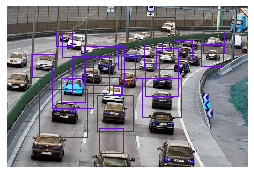

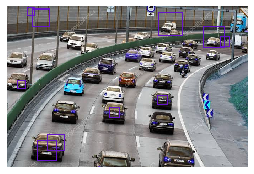

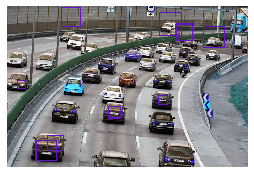

In [0]:
imagens = threshold()

for im in range(len(imagens)):
  img = cv2.imread('carro_2.jpg')
  aplicarHar(imagens[im], img) 
  mostrarResultado(im+1)

###4. Aplicando o Haar para uma imagem utilizando binarização com limiar

###7. Aplicando Haar para uma imagem utilizando segmentação e métodos de detecção de bordas

6.1 Aplicando Haar Cascade - Imagem com filtro Sobel

6.2 Aplicando Haar Cascade - Imagem com filtro Laplacian

6.3 Aplicando Haar Cascade - Imagem com filtro Canny